<a href="https://colab.research.google.com/github/akash1629/ECOMMERCE-SEGMENTATION/blob/main/ECOMMERCE_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

file = pd.read_csv('/content/E-com_Data.csv')
print(file.head())

   CustomerID Item Code  InvoieNo Date of purchase  Quantity        Time  \
0      4355.0     15734    398177       29-10-2017         6  3:36:00 PM   
1      4352.0     14616    394422       05-10-2017         2  2:53:00 PM   
2      4352.0     14614    394422       12-10-2017         2  2:53:00 PM   
3      4352.0    85014B    388633       22-08-2017         3  2:47:00 PM   
4      4352.0     15364    394422       10-10-2017         2  2:53:00 PM   

   price per Unit   Price Shipping Location  
0           321.0  1926.0        Location 1  
1           870.0  1740.0        Location 1  
2           933.0  1866.0        Location 1  
3           623.0  1869.0        Location 1  
4           944.0  1888.0        Location 1  


getting the details in file

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  int64  
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  int64  
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 36.9+ MB


# New Section

finding the missing value if there is present in data

In [54]:
file.isnull().sum()

,0
CustomerID,133790
InvoieNo,0
Date,0
Price,0


As we need only limited columns like amount for monetary , date for latest purchase as recency and invoice no for frequncy as how often a customer buy from you as we are tracking customers by induvidually or collectively and also customer id as well

In [63]:
file = file[['CustomerID','InvoieNo','Date','Price']]
file.head()

,CustomerID,InvoieNo,Date,Price
0,4355.0,398177,29-10-2017,1926.0
1,4352.0,394422,05-10-2017,1740.0
2,4352.0,394422,12-10-2017,1866.0
3,4352.0,388633,22-08-2017,1869.0
4,4352.0,394422,10-10-2017,1888.0


As a date of purchase is of object or string format we need it in datetime format

In [61]:
print(file.columns)

Index(['CustomerID', 'InvoieNo', 'Date', 'Price'], dtype='object')


In [64]:
file['Date '] = pd.to_datetime(file['Date'])
file.head()


,CustomerID,InvoieNo,Date,Price,Date
0,4355.0,398177,29-10-2017,1926.0,2017-10-29
1,4352.0,394422,05-10-2017,1740.0,2017-10-05
2,4352.0,394422,12-10-2017,1866.0,2017-10-12
3,4352.0,388633,22-08-2017,1869.0,2017-08-22
4,4352.0,394422,10-10-2017,1888.0,2017-10-10


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  404189 non-null  float64
 1   InvoieNo    537979 non-null  int64  
 2   Date        537979 non-null  object 
 3   Price       537979 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 16.4+ MB


convert date of purchase into date

In [68]:
file=file.rename(columns={'Date of purchase':'Date'})
file.head()

,CustomerID,InvoieNo,Date,Price,Date
0,4355.0,398177,29-10-2017,1926.0,2017-10-29
1,4352.0,394422,05-10-2017,1740.0,2017-10-05
2,4352.0,394422,12-10-2017,1866.0,2017-10-12
3,4352.0,388633,22-08-2017,1869.0,2017-08-22
4,4352.0,394422,10-10-2017,1888.0,2017-10-10


from matplotlib import pyplot as plt
_df_15['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['InvoieNo'].plot(kind='hist', bins=20, title='InvoieNo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='CustomerID', y='InvoieNo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='InvoieNo', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date ']
  ys = series['CustomerID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Date ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date ')
_ = plt.ylabel('CustomerID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date ']
  ys = series['InvoieNo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Date ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date ')
_ = plt.ylabel('InvoieNo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date ']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Date ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date ')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date ']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date '}, axis=1)
              .sort_values('Date ', ascending=True))
  xs = counted['Date ']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Date ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date ')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['InvoieNo'].plot(kind='line', figsize=(8, 4), title='InvoieNo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='CustomerID', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='InvoieNo', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Price', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [67]:
import datetime as dt
current_date=dt.datetime.now()
print(current_date)

2024-09-22 15:16:56.366058


now, we have done the datatype change for date into datetime , its time to create RFM columns for each customer by grouping all data related to each customer like his purchase from last dates with how many times he visit there etc.
 so basically we need groupby funstion to group based on customerid as each customer is there .
  we need to do separate operations on each data like sum of all purchases, count of all invocies as frequency etc. so to do this we have agg() function .
     Now to apply a these function on each customer we have lambda function with help tp give expression to perform like count, sum for each respecitvely.

 recency will be a customers last transaction as to calculate that customers last purchase was 254 days prior/earlier from todays date i.e. todays date/current date - recent date he purchase something i.e. x.max() ,
 count of how many purchases he made as  invocies for each customer,
 summation of prices for each customer .      

In [70]:
   RFMscore= file.groupby('CustomerID').agg({'Date':lambda x : (current_date -pd.to_datetime( x.max())).days,
                                             'InvoieNo': lambda x : x.count(),
                                             'Price': lambda x : x.sum()})



now give new names for columns as date becomes recency , invoiceNo becomes frequency , purchase as monetary

reset index is reuqired for dataframe we createde i.e. this box with 4 columns and 5 rows . so without reset index we will get customerid as index on one side and 3 columns so to make customerid as column we need to reset that index ,
inplace=True make changes reflect in same variable without it it wont reflect in output ie.date = recency , invoieNo = frequency etc.

In [71]:
RFMscore.rename(columns={ 'Date': 'recency','InvoieNo': 'frequency', 'Price': 'monetary'}, inplace= True)
RFMscore.reset_index(inplace= True)
RFMscore.head()

,CustomerID,recency,frequency,monetary
0,2.0,2791,182,553704.0
1,3.0,2791,27,257404.0
2,4.0,2488,72,176613.0
3,5.0,2486,16,41976.0
4,6.0,2732,84,151822.0


from matplotlib import pyplot as plt
_df_0['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='CustomerID', y='recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='recency', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['monetary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('monetary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

Till now we have done Data analytics , so now we are going to do Unsupervised model based on tilll work .
sklearn is library , cluster is module and kmeans is file

In [35]:
from sklearn.cluster import KMeans

to do standard scaling means giving same unit to all columns as recency in date, price in curreency , frequnecy is in numbers , to make in same unit standardscaler is required

In [72]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
unsupervised = sc.fit_transform(RFMscore[['recency','frequency','monetary']])
unsupervised

array([[ 1.62014036,  0.38377233,  0.37771707],
       [ 1.62014036, -0.28413276,  0.03204108],
       [-1.15400138, -0.09022483, -0.06221308],
       ...,
       [-0.19266514, -0.34445967, -0.23913548],
       [-0.87933388,  2.84855758,  0.05911184],
       [ 0.52147036, -0.09884296,  0.03835962]])

After the scaling of data into standARDIZED way now convert them into groups or clusters vis k emeans clustering
we have already imported from sklearn.cluster import KMeans so start next part .

check the book to know little bit for WCSS (distance in simply)
we need wcss to sotre value for each k no of cluster



In [74]:
WCSS = []

GET  a range for clusters k and wei know we have imported a function kmeans from scikitlearn library and module clusters.
kmeans has a syntax
KMeans(n_clusters=k , random_state=42)  nP_cluster is no of value k
random_state is random placing of cluster and it will start to change as per k
KMeans(n_clusters=k , random_state=42) is store in variable kmeans.

In [75]:
for k in range (2,12):
  kmeans = KMeans(n_clusters=k , random_state=42)
  kmeans.fit(unsupervised)        # unsupoerwvised data file is be fit in kmeans algorithm . kalgorithm will be appolied on unsupervised file converw into k clusters
  WCSS.append(kmeans.inertia_)  # storing each distance vlue for each cluster k applied on file


now , distance is measured , time to plot cuvre to see the sharp change or elbow to get opotimized value of k

here 5 or 6 is elbow point where k value is optimized because we need low distance or low wcss value which is looking sharply reducing or lowing after 5 or 6 value of k . after that it start to get leveling off after 6 or 7 on horizontal way .

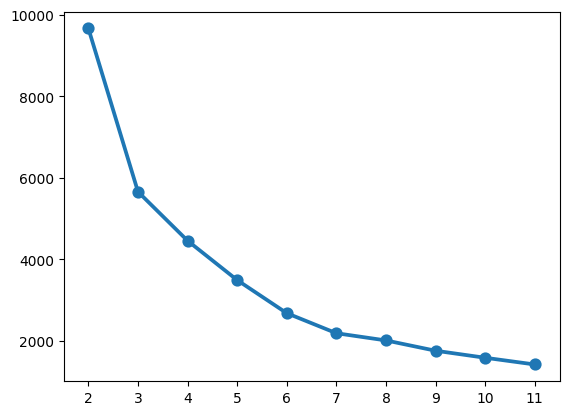

In [76]:
#getting elbow curve
sns.pointplot(x=list(range(2,12)),y=WCSS)      # using seaborn
plt.show()                                  #using matplotlib.pyplot as plt





In [86]:
RFMscore = pd.DataFrame(RFMscore)
RFMscore["clusters"]=kmeans.labels_
RFMscore

,CustomerID,recency,frequency,monetary,clusters
0,2.0,2791,182,553704.0,1
1,3.0,2791,27,257404.0,1
2,4.0,2488,72,176613.0,3
3,5.0,2486,16,41976.0,3
4,6.0,2732,84,151822.0,9
...,...,...,...,...,...
4344,4368.0,2746,10,20480.0,9
4345,4369.0,2649,7,10774.0,0
4346,4370.0,2593,13,24962.0,0
4347,4371.0,2518,754,280608.0,7


from matplotlib import pyplot as plt
RFMscore['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
RFMscore['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
RFMscore['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
RFMscore['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
RFMscore.plot(kind='scatter', x='CustomerID', y='recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
RFMscore.plot(kind='scatter', x='recency', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
RFMscore.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
RFMscore.plot(kind='scatter', x='monetary', y='clusters', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = RFMscore.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = RFMscore.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['monetary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = RFMscore.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('monetary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['clusters']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = RFMscore.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('clusters')

from matplotlib import pyplot as plt
RFMscore['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
RFMscore['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
RFMscore['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
RFMscore['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

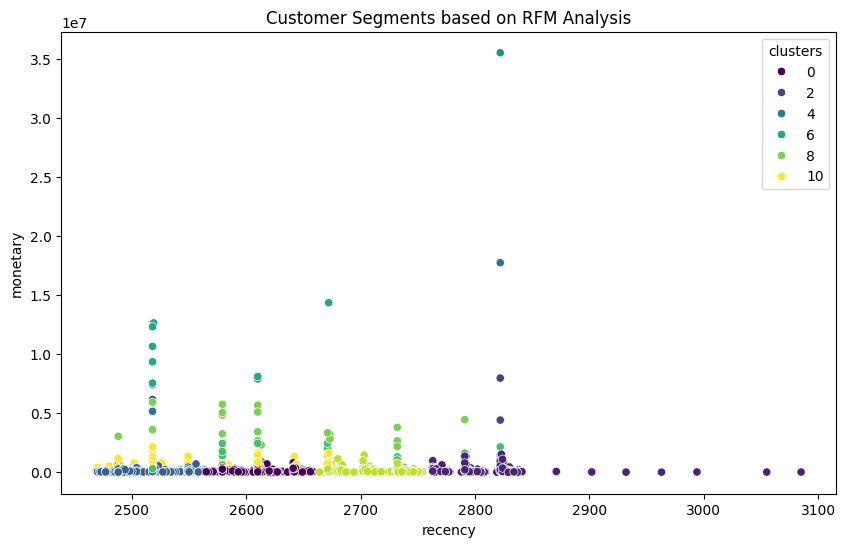

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='monetary', hue='clusters', data= RFMscore, palette='viridis')
plt.title('Customer Segments based on RFM Analysis')
plt.show()

This above graph shows that :
on x axis recency means how recently customer made purchase left side i.e. 2500 is recent purchase is done it is lowest in graph and 3100 shows after those days a purchase is done a high recency .
on y axis - monetary hoe much moiney is spend from0 to 1crore as 1e7.

as we know we have 6 clusters or groups comes from elbow in earlier at 5th or 6th point as k value . those 6 groups or clusters are use to put entire data into it .
they all divide in low rwecency ie.e.2500 , high recency 3100 , low monetary i.e. 0 high monetaRY 1 CRORE .
those 0,2,4,6,8,10 are just names for clusters they are label with colour and no. each cluster has contain customers wiith similar behaviour.

In [83]:
print(RFMscore.columns)

Index(['CustomerID', 'recency', 'frequency', 'monetary'], dtype='object')
